In [ ]:
#Cleaning the dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Load and read the dataset
file_path="healthcare-dataset-stroke-data.csv"
df=pd.read_csv(file_path)

#Fill missing 'bmi' values with the median to maintain the data consistency
df['bmi'].fillna(df['bmi'].median(),inplace=True)

#Drop duplicates rows to ensure unique enteries
df_cleaned=df.drop_duplicates()

#Defining a list of colomns which needs to be converted to numbers
categorical_cols=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoders={}

#Iterate over the list of categorial colomns
for i in categorical_cols:
    #Initialize a label encoder to convert text into numbers
    le=LabelEncoder()
    #Fit_transform does 2 things:
    #Mapping and convert colomn values into numeric data
    df_cleaned[i]=le.fit_transform(df_cleaned[i])

#Save the final cleaned and encoded dataset
encoded_file_path = "encoded_stroke_data.csv"
df_cleaned.to_csv(encoded_file_path, index=False)

#Print teh results
print(f"Cleaned and encoded data saved to {encoded_file_path}")

Cleaned and encoded data saved to encoded_stroke_data.csv


<ipython-input-5-336ea1b1f7ee>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(),inplace=True)


gender
0    2994
1    2115
2       1
Name: count, dtype: int64


<ipython-input-8-26f582f09031>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


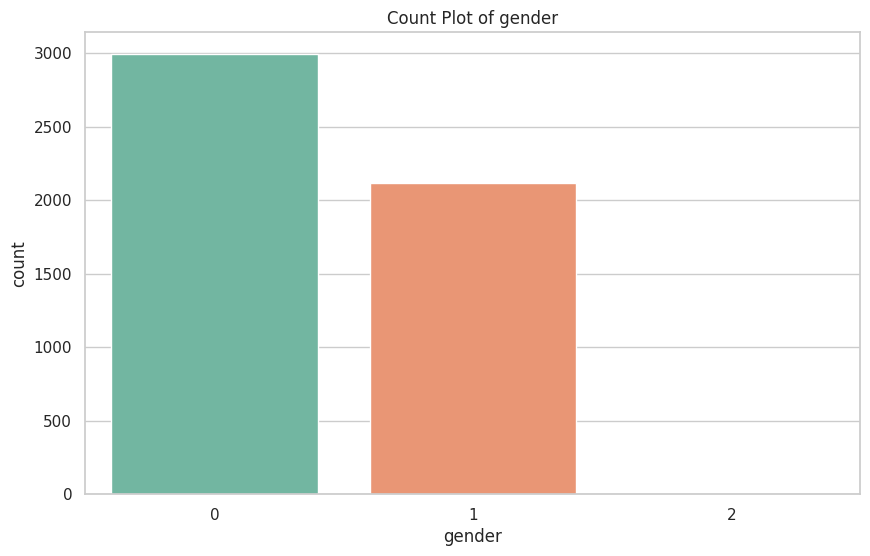

hypertension
0    4612
1     498
Name: count, dtype: int64


<ipython-input-8-26f582f09031>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


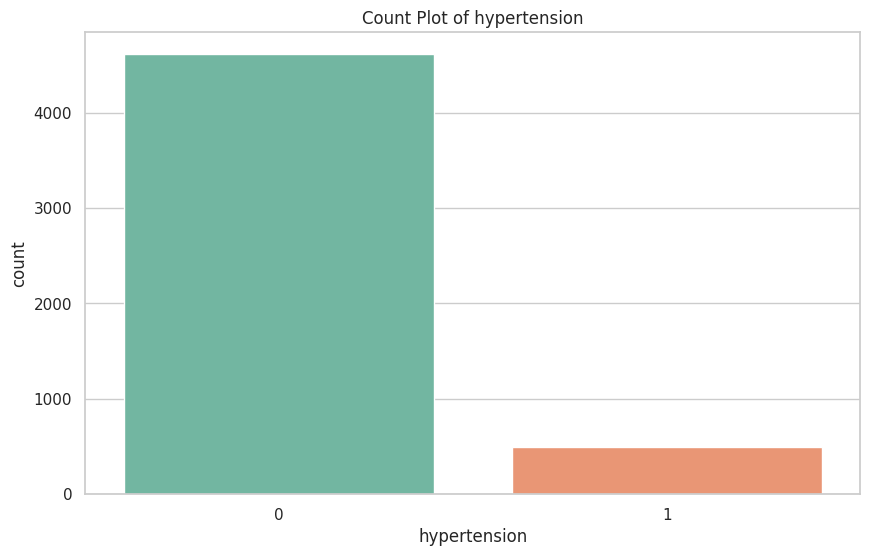

heart_disease
0    4834
1     276
Name: count, dtype: int64


<ipython-input-8-26f582f09031>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


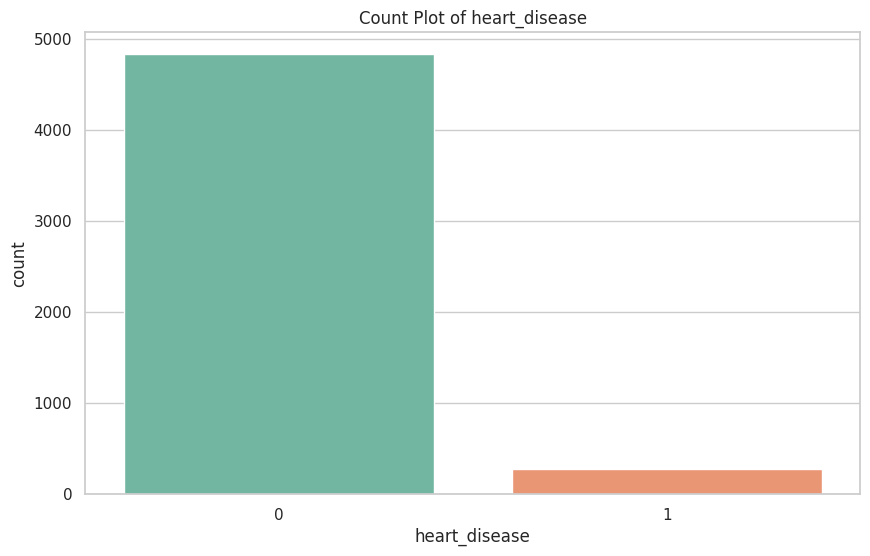

ever_married
1    3353
0    1757
Name: count, dtype: int64


<ipython-input-8-26f582f09031>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


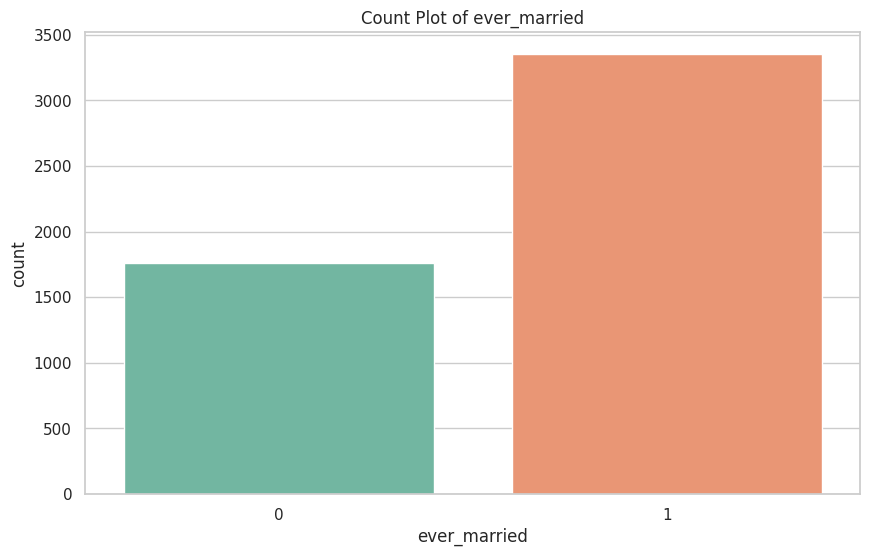

work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64


<ipython-input-8-26f582f09031>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


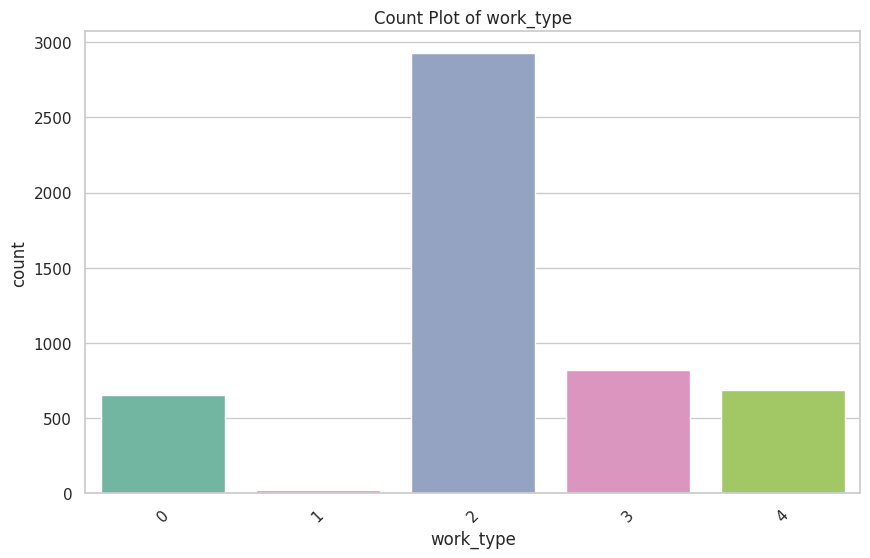

Residence_type
1    2596
0    2514
Name: count, dtype: int64


<ipython-input-8-26f582f09031>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


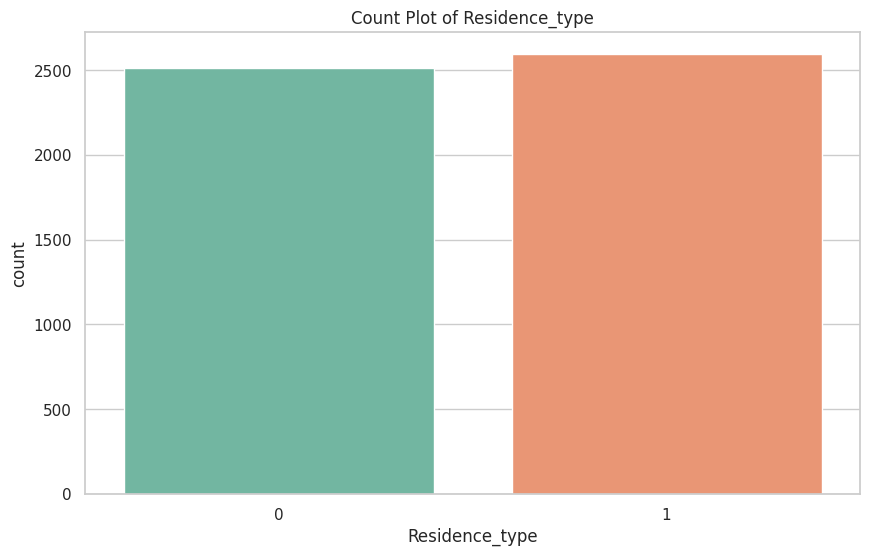

smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64


<ipython-input-8-26f582f09031>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


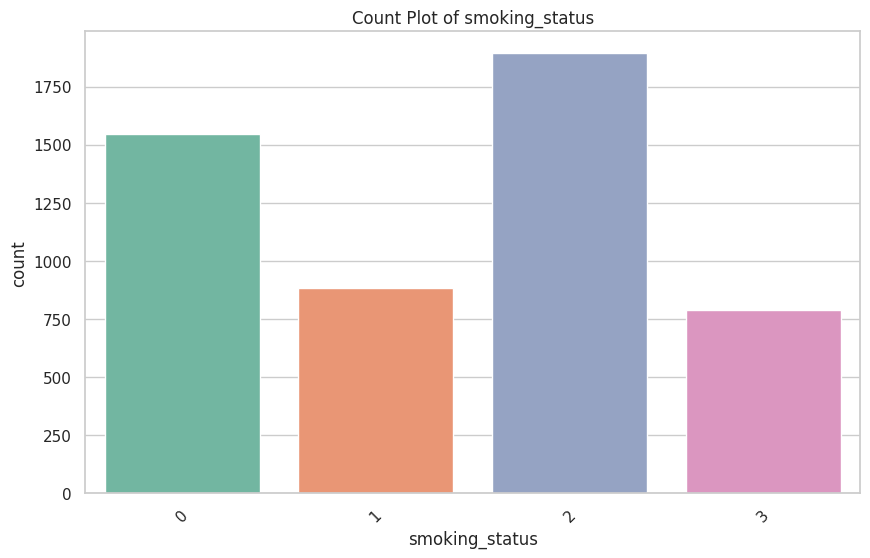

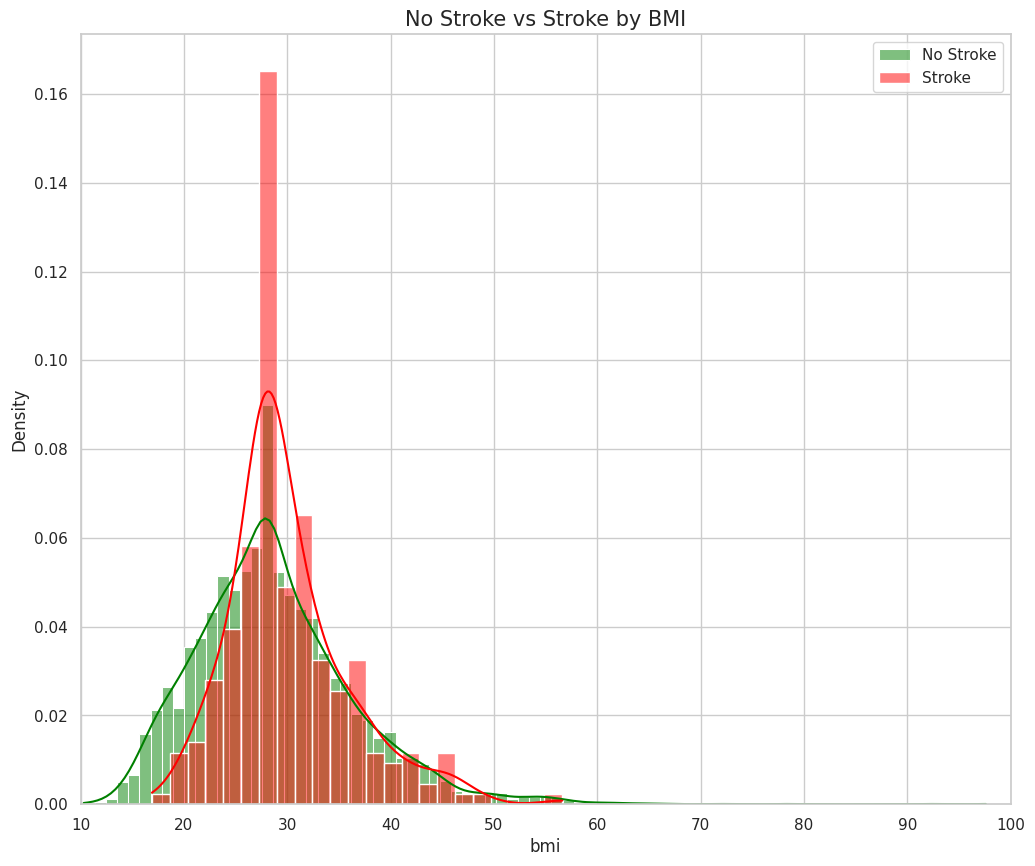

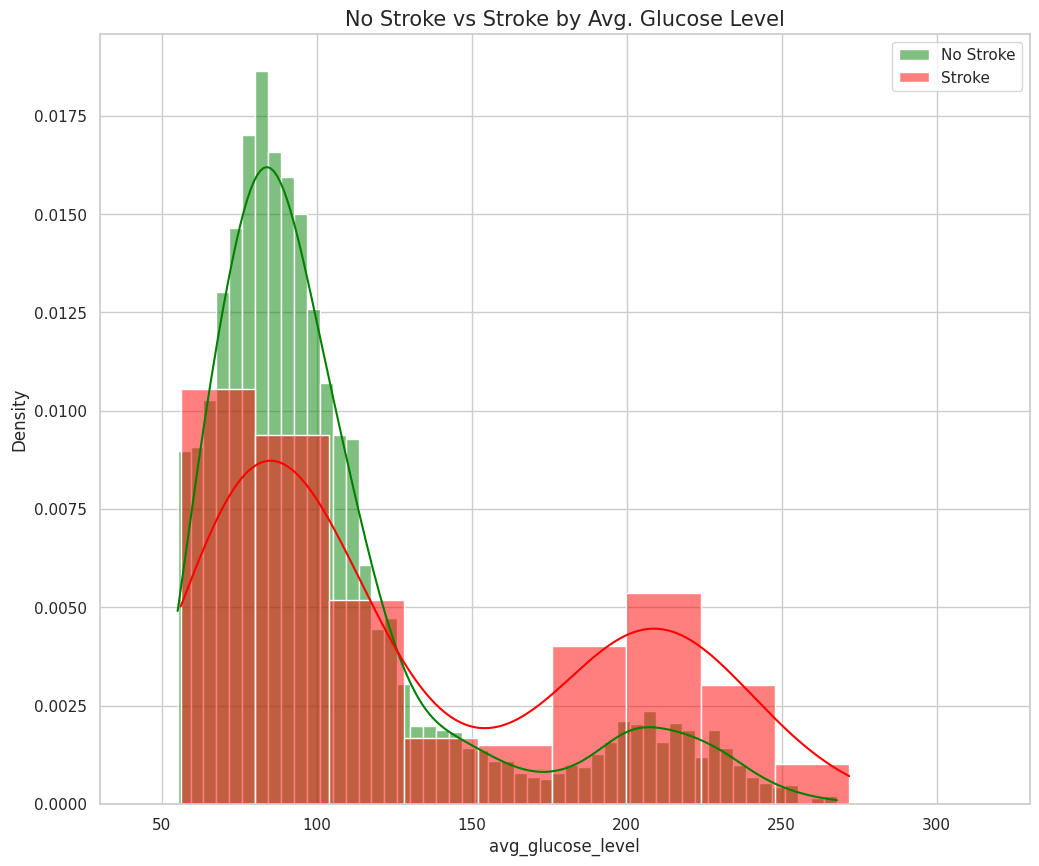

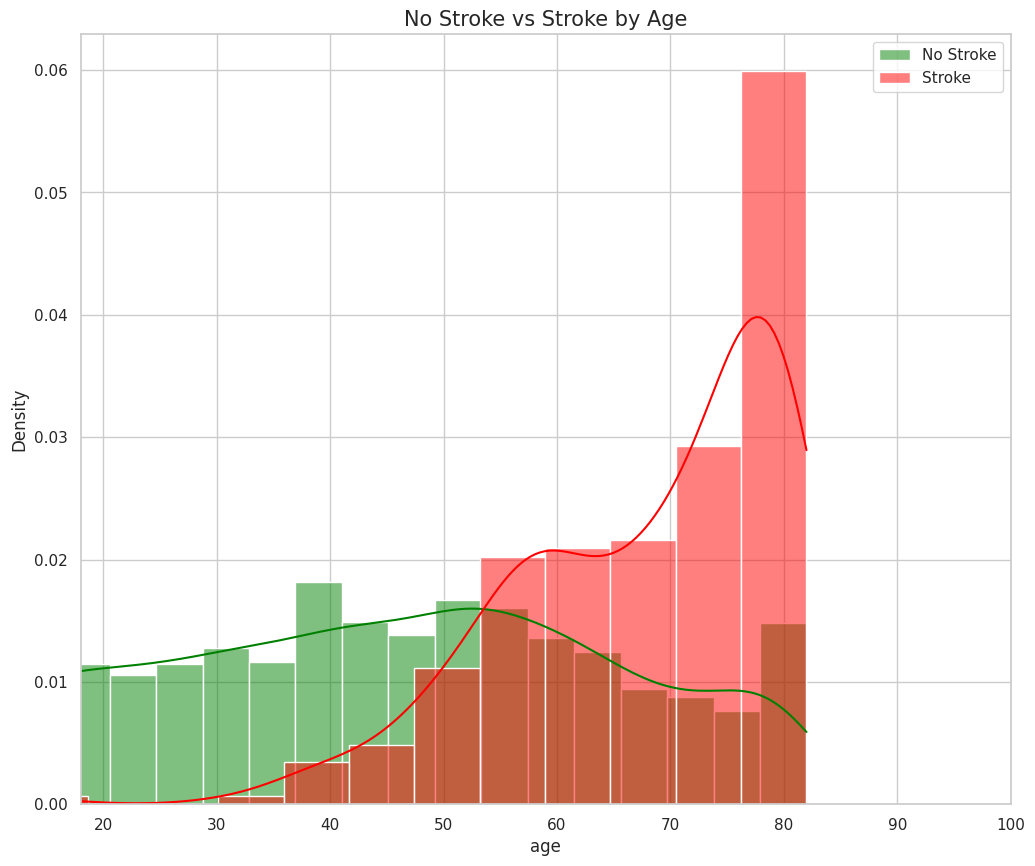

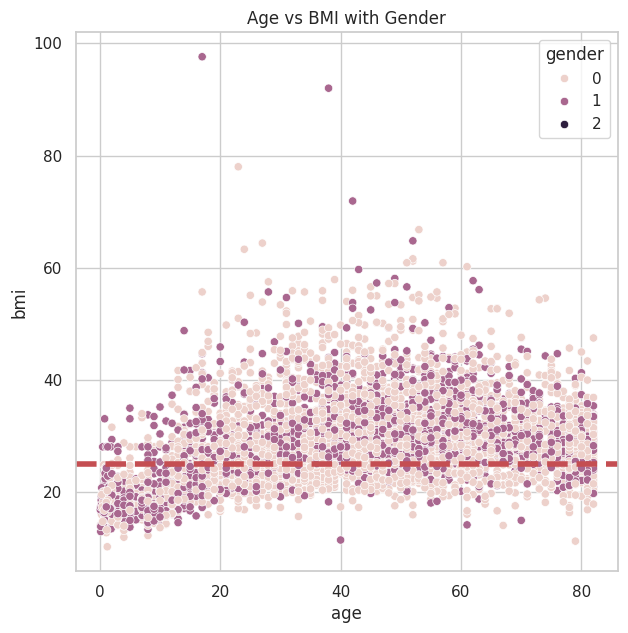

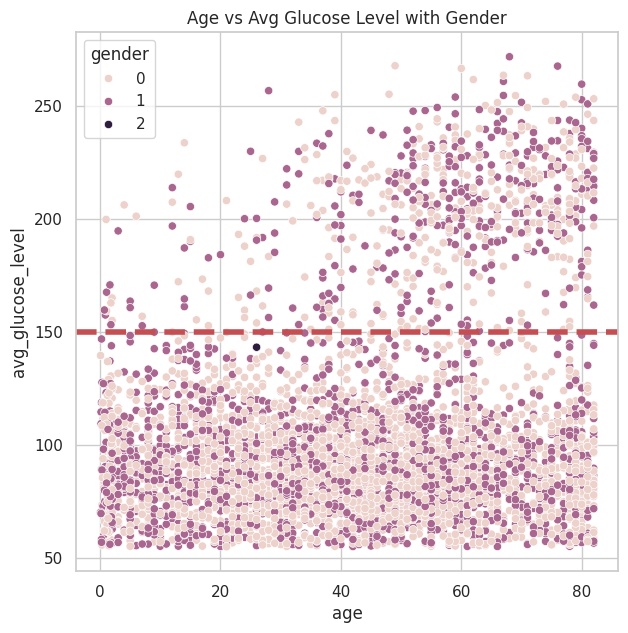

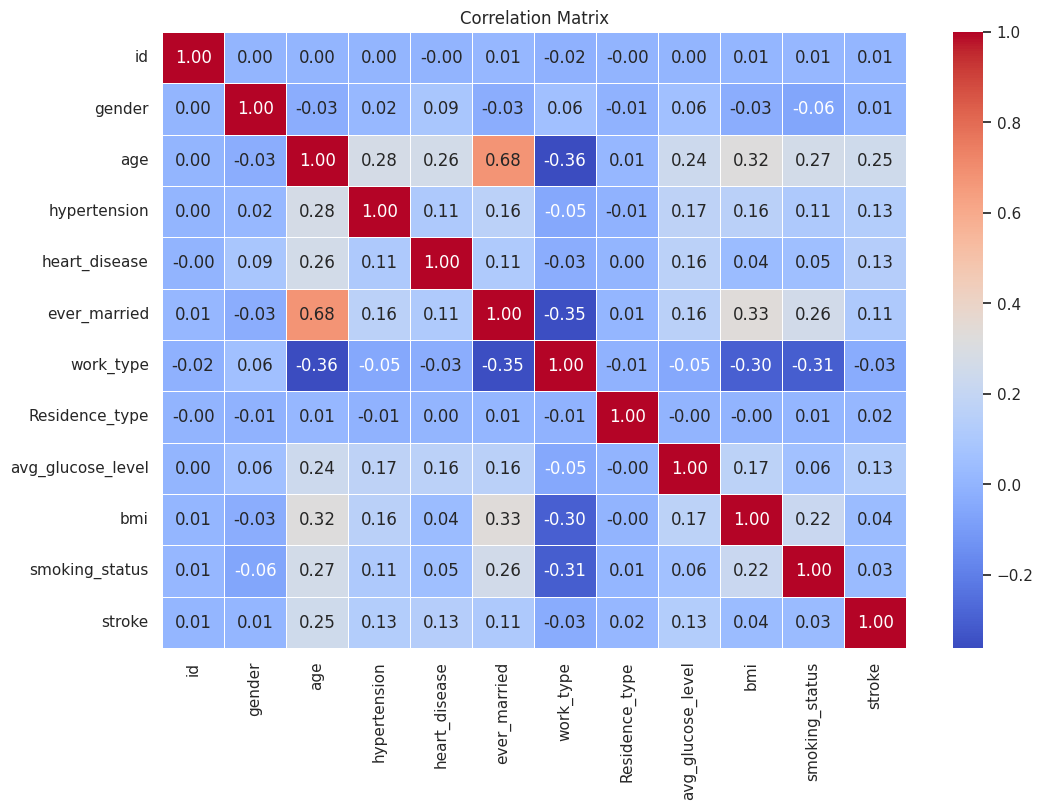

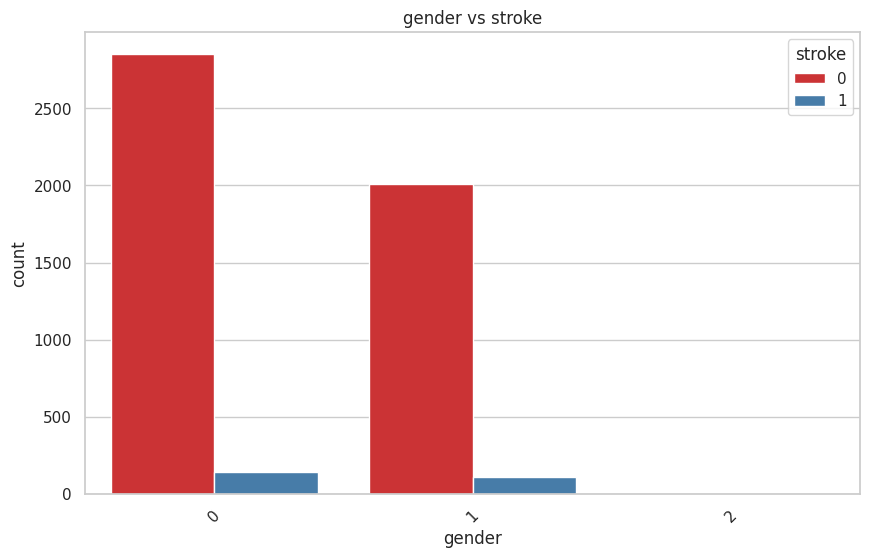

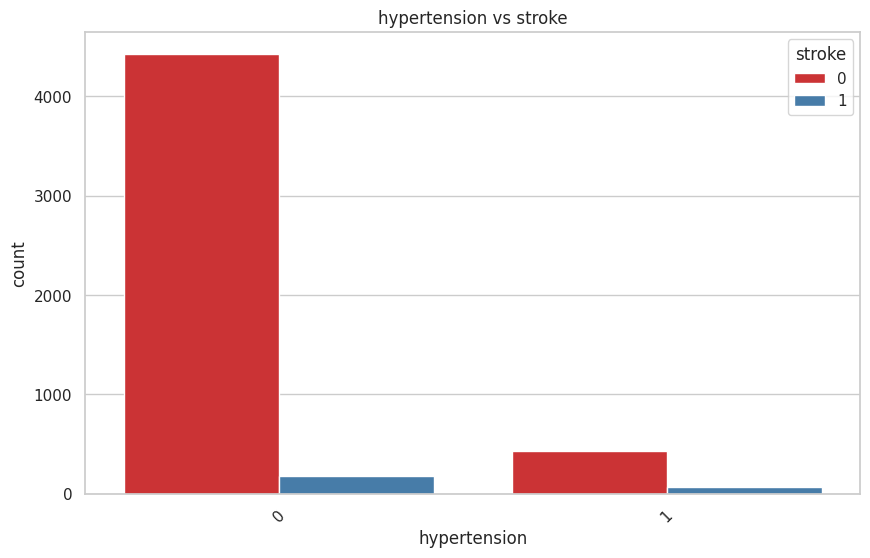

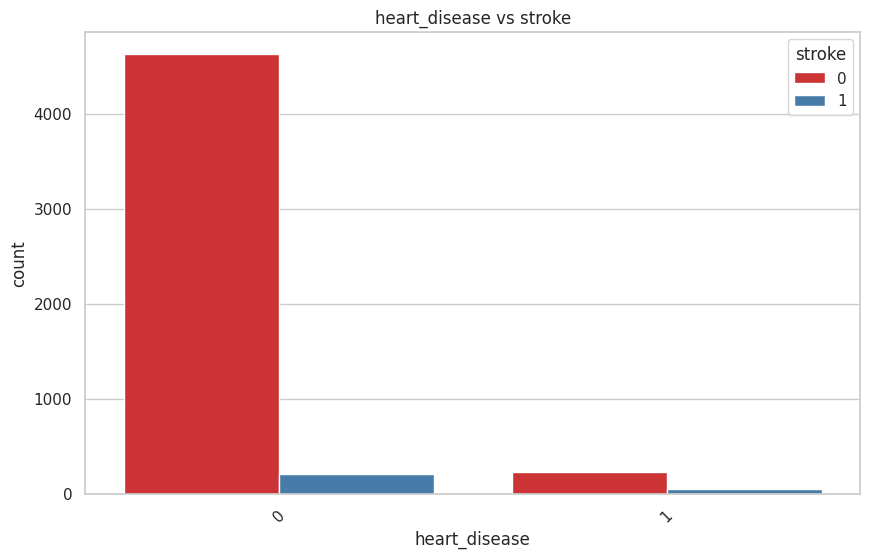

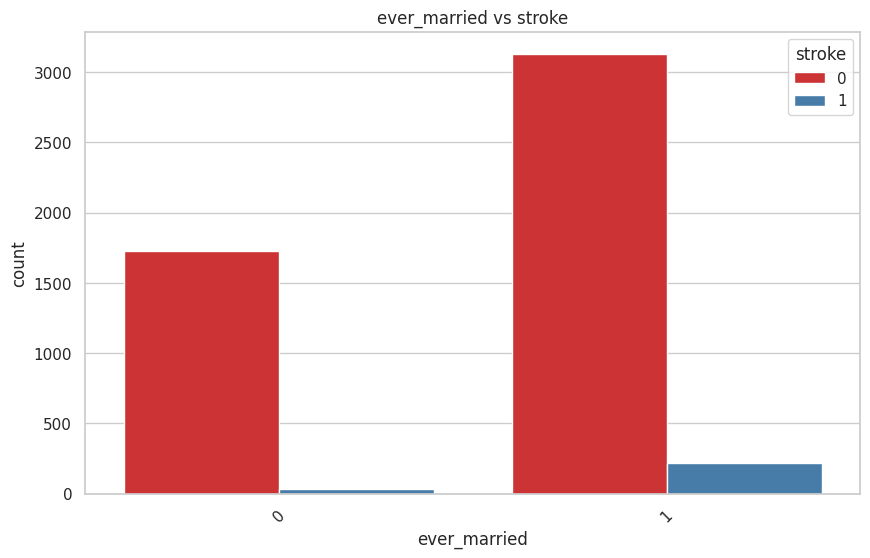

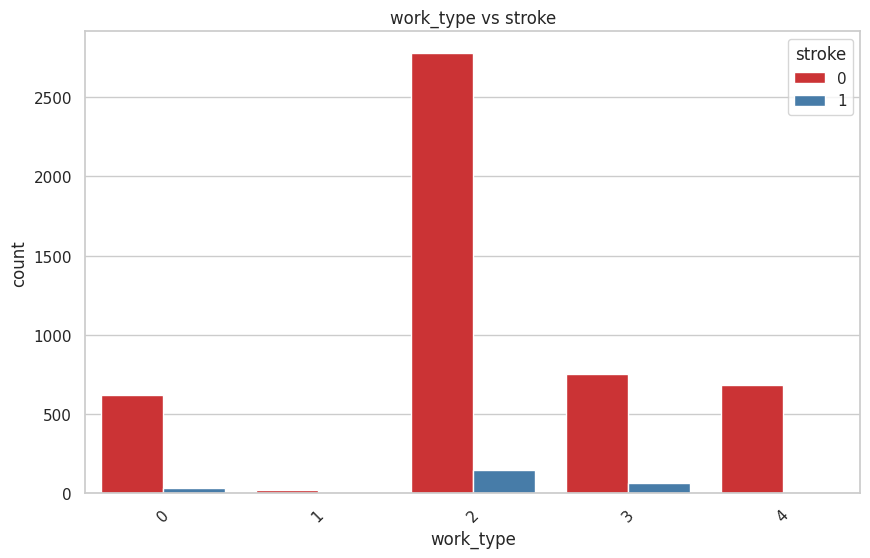

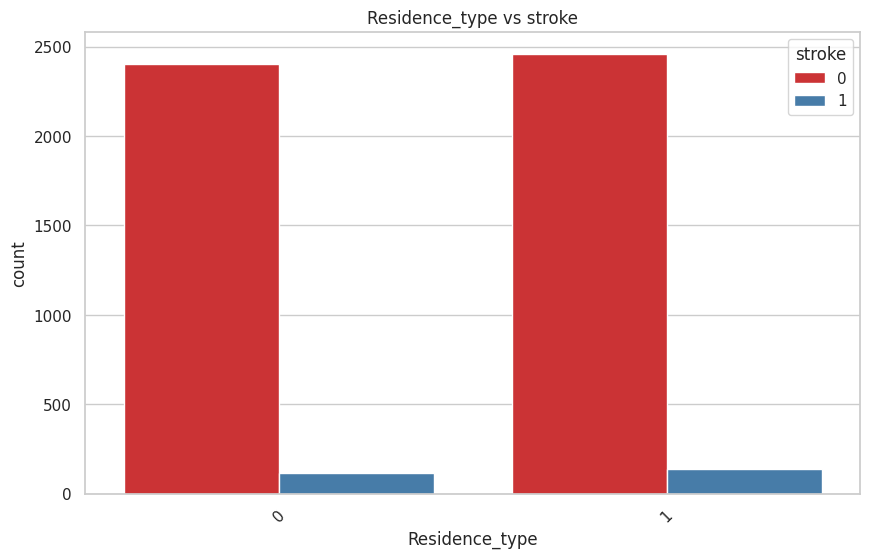

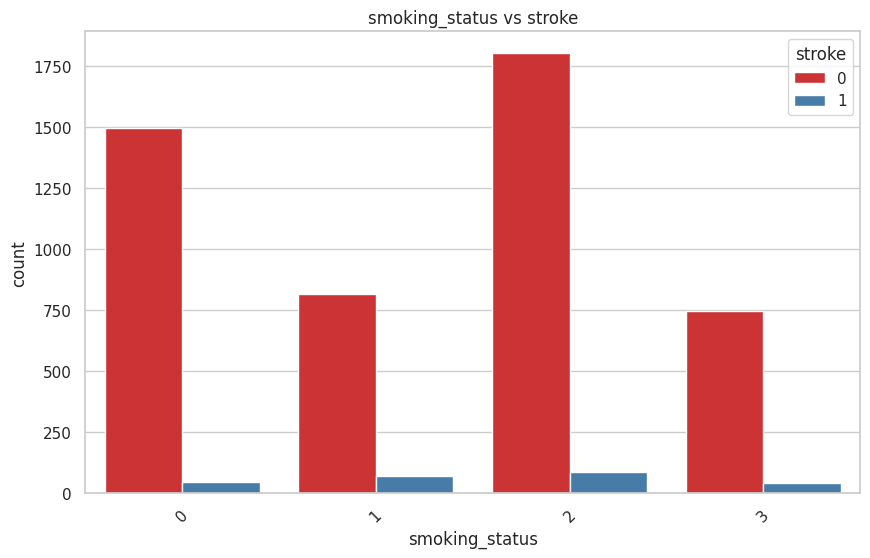

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
df = pd.read_csv("encoded_stroke_data.csv")

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Individual Count Plots for Categorical Features
# (Assuming these are categorical in your encoded dataset)
cat_cols = [
    'gender', 'hypertension', 'heart_disease', 'ever_married',
    'work_type', 'Residence_type', 'smoking_status'
]
# Gender
print(df.gender.value_counts())
ax = sns.countplot(
    data=df,
    x="gender",
    palette="Set2"
)
plt.title("Count Plot of gender")
plt.show()
# Hypertension
print(df.hypertension.value_counts())
ax = sns.countplot(
    data=df,
    x="hypertension",
    palette="Set2"
)
plt.title("Count Plot of hypertension")
plt.show()
# Heart Disease
print(df.heart_disease.value_counts())
ax = sns.countplot(
    data=df,
    x="heart_disease",
    palette="Set2"
)
plt.title("Count Plot of heart_disease")
plt.show()
# Ever Married
print(df.ever_married.value_counts())
ax = sns.countplot(
    data=df,
    x="ever_married",
    palette="Set2"
)
plt.title("Count Plot of ever_married")
plt.show()
# Work Type
print(df.work_type.value_counts())
ax = sns.countplot(
    data=df,
    x="work_type",
    palette="Set2"
)
plt.title("Count Plot of work_type")
plt.xticks(rotation=45)
plt.show()
# Residence Type
print(df.Residence_type.value_counts())
ax = sns.countplot(
    data=df,
    x="Residence_type",
    palette="Set2"
)
plt.title("Count Plot of Residence_type")
plt.show()
# Smoking Status
print(df.smoking_status.value_counts())
ax = sns.countplot(
    data=df,
    x="smoking_status",
    palette="Set2"
)
plt.title("Count Plot of smoking_status")
plt.xticks(rotation=45)
plt.show()
# 2. Distribution Plots - Stroke vs No Stroke
plt.figure(figsize=(12, 10))
sns.histplot(
    df[df['stroke'] == 0]["bmi"],
    color='green',
    kde=True,
    label="No Stroke",
    stat="density"
)
sns.histplot(
    df[df['stroke'] == 1]["bmi"],
    color='red',
    kde=True,
    label="Stroke",
    stat="density"
)
plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10, 100])
plt.legend()
plt.show()
plt.figure(figsize=(12, 10))
sns.histplot(
    df[df['stroke'] == 0]["avg_glucose_level"],
    color='green',
    kde=True,
    label="No Stroke",
    stat="density"
)
sns.histplot(
    df[df['stroke'] == 1]["avg_glucose_level"],
    color='red',
    kde=True,
    label="Stroke",
    stat="density"
)
plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30, 330])
plt.legend()
plt.show()
plt.figure(figsize=(12, 10))
sns.histplot(
    df[df['stroke'] == 0]["age"],
    color='green',
    kde=True,
    label="No Stroke",
    stat="density"
)
sns.histplot(
    df[df['stroke'] == 1]["age"],
    color='red',
    kde=True,
    label="Stroke",
    stat="density"
)
plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18, 100])
plt.legend()
plt.show()
# 3. Scatter plots
fig = plt.figure(figsize=(7, 7))
graph = sns.scatterplot(
    data=df,
    x="age",
    y="bmi",
    hue='gender'
)
graph.axhline(y=25, linewidth=4, color='r', linestyle='--')
plt.title("Age vs BMI with Gender")
plt.show()
fig = plt.figure(figsize=(7, 7))
graph = sns.scatterplot(
    data=df,
    x="age",
    y="avg_glucose_level",
    hue='gender'
)
graph.axhline(y=150, linewidth=4, color='r', linestyle='--')
plt.title("Age vs Avg Glucose Level with Gender")
plt.show()
# 4. Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix")
plt.show()
# 5. Count plots: Categorical Features vs Stroke
target = 'stroke'
for col in cat_cols:
    if col != target:
        plt.figure()
        sns.countplot(
            data=df,
            x=col,
            hue=target,
            palette='Set1'
        )
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
        plt.show()




In [ ]:
#Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from scipy.stats import mode

#load and read the cleaned stroke dataset
df_encoded=pd.read_csv('encoded_stroke_data.csv')

#split data into features (X) and target (y)
#X stores all the colomns except stroke
#y stores the stroke colomn
X=df_encoded.drop(columns=['stroke'])
y=df_encoded['stroke']

#balance the data using SMOTE to handle class imbalance
#if not used SMOTE the model would get biased towards "no stroke" all the time leading to high accuracy because no stroke data is more than stroke data
#SMOTE looks for the minority class
smote=SMOTE(random_state=42)
#then it fits and resample the data and stores the balanced dataset in X_resampled and y_resampled
X_resampled,y_resampled=smote.fit_resample(X,y)

#split the balanced data into training and testing sets (80% train, 20% test)
#total number of sample are 5110
#test sample: 0.2 x 5110 = 1022
#train sample: 0.8 x 5110 = 4088
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42,stratify=y_resampled)

#train a Random Forest model with 5 decision trees
#we can create as many tree as we want but creating more tree would require more RAM and time required would also be more and after 100 to 200 trees performance also stabilizes so we are creating 5 trees
#step 1:RandomForestClassifier internally performs Boothstrap sampling for each 5 trees it randomly selects samples with replacement from X_train and y_train
rf_model=RandomForestClassifier(n_estimators=5,random_state=42)

#step 2:this creates decision tree interally by selecting a random boothstrap sample from the X_train and y_train
#we used X_train and y_train because train dataset is used to build the model we built decision tree using the train dataset
#train dataset is used to build the model and test dataset is used to evaluate the model
rf_model.fit(X_train,y_train)

#rf_model.estimators_ gives us the list of indivisual decision tree inside the trained Random forest
#tree.predict(X_test) makes prediction from each tree on test data
#np.array converts the list of prediction to 2D array
#we used X_test.values beacuse test dataset is used to evaluate the model
tree_preds=np.array([tree.predict(X_test.values) for tree in rf_model.estimators_])

print("Individual Decision Tree Predictions (first 10 test samples):")
#starting the loop over each row that is each trees prediction
#preds[:10] prints the first 10 predictions made by each tree
#print the prediction which are made
for idx,preds in enumerate(tree_preds):
    print(f"Tree {idx+1}:{preds[:10]}")

#step 3:now as we want to select the majority class we will use mode which is defined as highest occuring data from tree_preds
#axis=0 is used to select the data colomn wise
#keepdims=False is used just to prevent extra dimension in the result
y_pred_majority=mode(tree_preds,axis=0,keepdims=False).mode

#printing the final output with 10 majority predicted data
print("\nFinal Predictions by Majority Voting (first 10 test samples):")
print(y_pred_majority[:10])

#calculate and print performance metrics of the final predictions
accuracy_rf=accuracy_score(y_test,y_pred_majority)
precision_rf=precision_score(y_test,y_pred_majority)
recall_rf=recall_score(y_test,y_pred_majority)
f1_rf=f1_score(y_test,y_pred_majority)

#printing the results
print("\nPerformance Metrics:")
print(f"Accuracy:{accuracy_rf:.4f}")
print(f"Precision:{precision_rf:.4f}")
print(f"Recall:{recall_rf:.4f}")
print(f"F1-score:{f1_rf:.4f}")

Individual Decision Tree Predictions (first 10 test samples):
Tree 1:[1. 1. 0. 1. 0. 0. 0. 1. 1. 1.]
Tree 2:[1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]
Tree 3:[1. 1. 1. 1. 0. 1. 0. 1. 1. 1.]
Tree 4:[1. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
Tree 5:[1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]

Final Predictions by Majority Voting (first 10 test samples):
[1. 1. 0. 1. 0. 1. 0. 1. 1. 1.]

Performance Metrics:
Accuracy:0.9254
Precision:0.8995
Recall:0.9578
F1-score:0.9278


Accuracy: 0.658611825192802
Precision: 0.5952970297029703
Recall: 0.9897119341563786
F1 Score: 0.7434312210200927


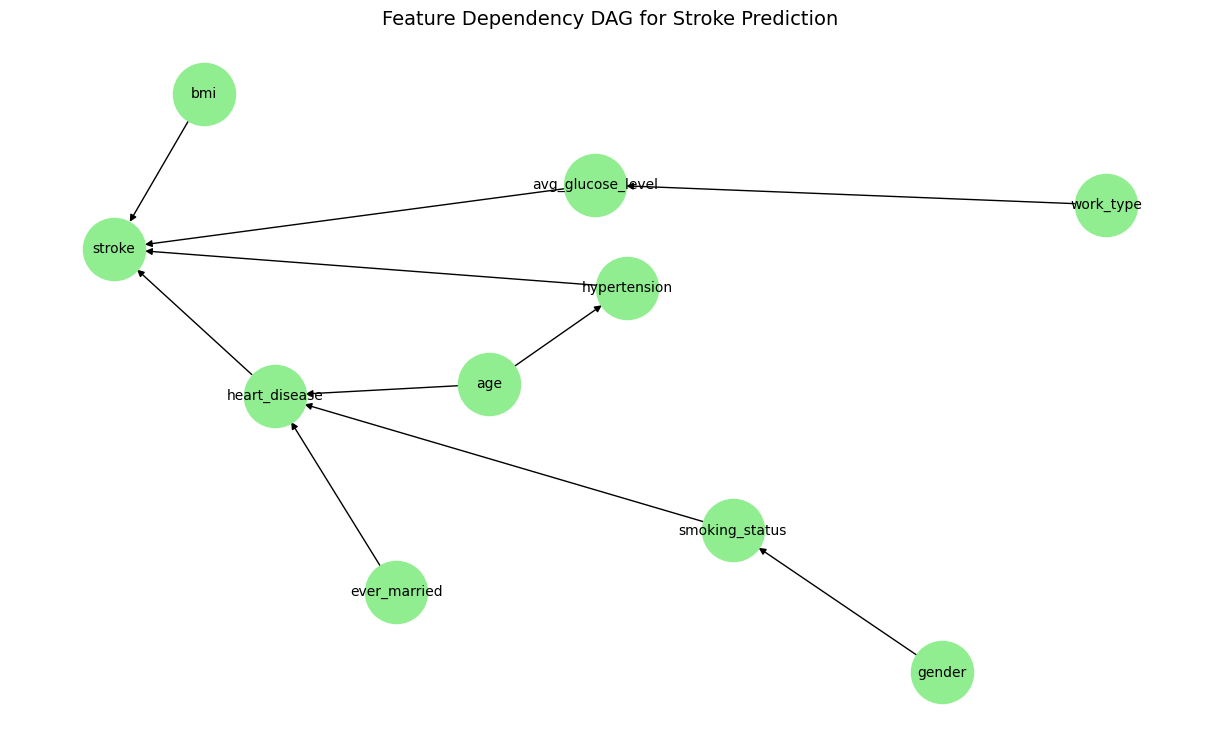

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import networkx as nx

#load and read the cleaned stroke dataset
df=pd.read_csv("encoded_stroke_data.csv")

#split data into features (X) and target (y)
#X stores all the colomns except stroke
#y stores the stroke colomn
X=df.drop(columns=["stroke"])
y=df["stroke"]

#balance the data using SMOTE to handle class imbalance
#if not used SMOTE the model would get biased towards "no stroke" all the time leading to high accuracy because no stroke data is more than stroke data
#SMOTE looks for the minority class
smote=SMOTE(random_state=42)
#then it fits and resample the data and stores the balanced dataset in X_resampled and y_resampled
X_resampled,y_resampled=smote.fit_resample(X,y)

#split the balanced data into training and testing sets (80% train, 20% test)
#total number of sample are 5110
#test sample: 0.2 x 5110 = 1022
#train sample: 0.8 x 5110 = 4088
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42,stratify=y_resampled)

#train MLP model
#there is 1 hidden layer with 150 nodes in it change in the number of nodes affects the accuracy etc
#the max iteration or the epoches is 500 meaning the model goes through the entire training dataset 500 times to minimize error
mlp=MLPClassifier(hidden_layer_sizes=(150,),max_iter=500,random_state=42)
#trains the netural network using the train dataset
mlp.fit(X_train,y_train)

#predicts stroke labels for the test set using the trained model
y_pred=mlp.predict(X_test)

#print the results
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred,zero_division=1))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

#creating a directed acyclic graph which is fully independent of the above code
dag=nx.DiGraph()

#manually define feature dependencies (assumed there could be more)
#add_edges_from means defining edges from one node to another
dag.add_edges_from([
    ('age', 'hypertension'),
    ('age', 'heart_disease'),
    ('hypertension', 'stroke'),
    ('heart_disease', 'stroke'),
    ('avg_glucose_level', 'stroke'),
    ('bmi', 'stroke'),
    ('smoking_status', 'heart_disease'),
    ('gender', 'smoking_status'),
    ('ever_married', 'heart_disease'),
    ('work_type', 'avg_glucose_level')
])

#draw the DAG
#spring_layout generates the position of nodes in the graph
#seed=42 ensures the same layout whenever you run it
pos = nx.spring_layout(dag,seed=42)
plt.figure(figsize=(12,7))
#dag: the graph object with nodes
#with_labels=True shows nodes name like age, stroke etc
#node_color='lightgreen' makes all nodes color light green
#node_size=2000=makes nodes larger and more readable
#font_size=10=sets label size
#arrows=True=shows direction of influence
nx.draw(dag,pos,with_labels=True,node_color='lightgreen',node_size=2000,font_size=10,arrows=True)
plt.title("Feature Dependency DAG for Stroke Prediction",fontsize=14)
plt.show()

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE # a technique to balance the dataset by generating synthetic samples for minority class
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
print("------SVM-------")
# laoding the dataset
df=pd.read_csv("encoded_stroke_data.csv")
# drop the features if they are present in the csv file
X=df.drop(columns=['id', 'stroke'], errors='ignore')  # Drop if present
# Target variable
y=df['stroke']
# Stratified K-Fold Setup ( a 5 fold cross-validation)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# list to store for each fold
accuracies=[]
precisions=[]
recalls=[]
f1s=[]
# start with fold 1
fold=1
# this is the loop going through each fold and splits the data into training and validation indexes.
for train_index, val_index in skf.split(X, y):
    # Split data into training and validation
    X_train,X_val=X.iloc[train_index],X.iloc[val_index]
    y_train,y_val=y.iloc[train_index],y.iloc[val_index]
    # Apply SMOTE on training data to balance classes.
    smote=SMOTE(random_state=42)
    X_train_bal,y_train_bal=smote.fit_resample(X_train, y_train)
    # Scale features
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train_bal)
    X_val_scaled=scaler.transform(X_val)
    # Train SVM odel with RBF kernel on the training data
    model=SVC(kernel='rbf',C=1,gamma='scale',random_state=42)
    model.fit(X_train_scaled, y_train_bal)
    # used train model to predict the label for validation data
    y_pred=model.predict(X_val_scaled)
    # calculating
    acc=accuracy_score(y_val, y_pred)
    prec=precision_score(y_val, y_pred, average='weighted')
    rec=recall_score(y_val, y_pred, average='weighted')
    f1=f1_score(y_val, y_pred, average='weighted')
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    # save for this fold and then move onto another
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)
    fold+=1

# Average CV Scores across 5 folds
print("\n---Cross-Validation Results---")
print(f"Avg Accuracy: {np.mean(accuracies):.4f}")
print(f"Avg Precision: {np.mean(precisions):.4f}")
print(f"Avg Recall: {np.mean(recalls):.4f}")
print(f"Avg F1-score: {np.mean(f1s):.4f}")

# Final Evaluation on Hold-out Test Set (splits the data into 80 % training and 20 % testing)
print("\n--- Final Model on Hold-Out Test Set---")
X_train_final,X_test_final,y_train_final,y_test_final=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
# SMOTE only on training data
smote=SMOTE(random_state=42)
X_train_final_bal, y_train_final_bal=smote.fit_resample(X_train_final,y_train_final)
# Scale
scaler=StandardScaler()
X_train_final_scaled=scaler.fit_transform(X_train_final_bal)
X_test_final_scaled=scaler.transform(X_test_final)
# Train final model on training data
final_model=SVC(kernel='rbf',C=1,gamma='scale',random_state=42)
final_model.fit(X_train_final_scaled, y_train_final_bal)
# Predict the label on test set
y_pred_final=final_model.predict(X_test_final_scaled)
# calculating
final_accuracy=accuracy_score(y_test_final, y_pred_final)
final_precision=precision_score(y_test_final, y_pred_final, average='weighted')
final_recall=recall_score(y_test_final, y_pred_final, average='weighted')
final_f1=f1_score(y_test_final, y_pred_final, average='weighted')

print("\n===== Final Hold-Out Test Set Metrics =====")
print(f"Accuracy:  {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall:    {final_recall:.4f}")
print(f"F1-Score:  {final_f1:.4f}")

# Metrics
print("Classification Report (Final Test):\n", classification_report(y_test_final, y_pred_final))
# Confusion Matrix for Final Test Set (just print)
print("Confusion Matrix (Final Test Set):")
print(confusion_matrix(y_test_final, y_pred_final))



------SVM-------
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       972
           1       0.08      0.32      0.13        50

    accuracy                           0.79      1022
   macro avg       0.52      0.57      0.51      1022
weighted avg       0.92      0.79      0.85      1022

Confusion Matrix:
[[794 178]
 [ 34  16]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       972
           1       0.10      0.40      0.17        50

    accuracy                           0.80      1022
   macro avg       0.53      0.61      0.53      1022
weighted avg       0.92      0.80      0.85      1022

Confusion Matrix:
[[800 172]
 [ 30  20]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.13      0.48      0.20        50

    accuracy                           0.81      1022
   macro avg       0.55      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
print("-----GMM-------")
#Load Dataset
csv_path="encoded_stroke_data.csv"
target_column="stroke"

data=pd.read_csv(csv_path)
# Features and Labels
# drop the target feature
X=data.drop(columns=[target_column])
# keep the target column as true label
y_true=data[target_column]

# Standardize Features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Apply GMM (2 clusters: stroke vs no stroke)
# create a gmm model with 2 clusters
gmm=GaussianMixture(n_components=2, random_state=42)
# fit the gmm model into scaled data
gmm.fit(X_scaled)
# predict cluster label for each point
cluster_labels=gmm.predict(X_scaled)

# Fix Cluster Labels (Flip if needed)
# evaluate f1 score for original predicted labels
f1_original=f1_score(y_true, cluster_labels, average='weighted')
# evaluate f1 scores after flipped the label(0 to 1, 1 to 0)
f1_flipped=f1_score(y_true, 1 - cluster_labels, average='weighted')
# Flip if flipped labels give better match
if f1_flipped > f1_original:
    cluster_labels=1-cluster_labels

# Evaluation
accuracy=accuracy_score(y_true, cluster_labels)
precision=precision_score(y_true, cluster_labels, average='weighted')
recall=recall_score(y_true, cluster_labels, average='weighted')
f1=f1_score(y_true, cluster_labels, average='weighted')
cm=confusion_matrix(y_true, cluster_labels)
# Print Metrics
print("\nGMM Clustering Evaluation against True Labels:")
print("Classification Report:\n")
print(classification_report(y_true, cluster_labels, digits=4))
print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")



-----GMM-------

GMM Clustering Evaluation against True Labels:
Classification Report:

              precision    recall  f1-score   support

           0     0.9318    0.6573    0.7708      4861
           1     0.0089    0.0602    0.0155       249

    accuracy                         0.6282      5110
   macro avg     0.4703    0.3588    0.3932      5110
weighted avg     0.8868    0.6282    0.7340      5110

Confusion Matrix:
[[3195 1666]
 [ 234   15]]

Accuracy:  0.6282
Precision: 0.8868
Recall:    0.6282
F1-score:  0.7340
